In [1]:
### Importing packages

import pandas as pd
from glob import glob
import numpy as np
import os
import matplotlib.pyplot as plt
import starry
from tqdm.notebook import tqdm
from scipy.interpolate import interp1d
from scipy.linalg import block_diag
import theano
import theano.tensor as tt
import theano.sparse as ts


np.random.seed(12)
starry.config.lazy = False
starry.config.quiet = True

###### Options for rotation period : "r2.5", "r5", "r10" & "r20"

In [2]:
### Loading the data from Xanyu's files

rotation_period = "r5"

latitude = np.loadtxt("fluxmap_bd/latitude_fluxmap_"+rotation_period+".txt",skiprows=1)
num_lat = len(latitude)

longitude = np.loadtxt("fluxmap_bd/longitude_fluxmap_"+rotation_period+".txt",skiprows=1)
num_long = len(longitude)

time = np.loadtxt("fluxmap_bd/timeout_hour_fluxmap_"+rotation_period+".txt",skiprows=1)
num_time = len(time)

flux_map = np.loadtxt("fluxmap_bd/fluxmap_"+rotation_period+".txt")

In [3]:
### Creating array for the latitude/longitude map

a = np.empty((num_long,num_lat,num_time-1))
b = np.block([longitude,latitude])

In [4]:
### Loop to put values into Lat/Lon array

nn=0
for j in range(num_lat-1):
    for i in range(num_long-1):
        nn += 1
        a[i,j,:] = np.squeeze(flux_map[nn,3:])

In [5]:
### Plotting variable

ntime_plot = 1

In [6]:
### Swap 1st and second column

a=np.transpose(a,(1,0,2))

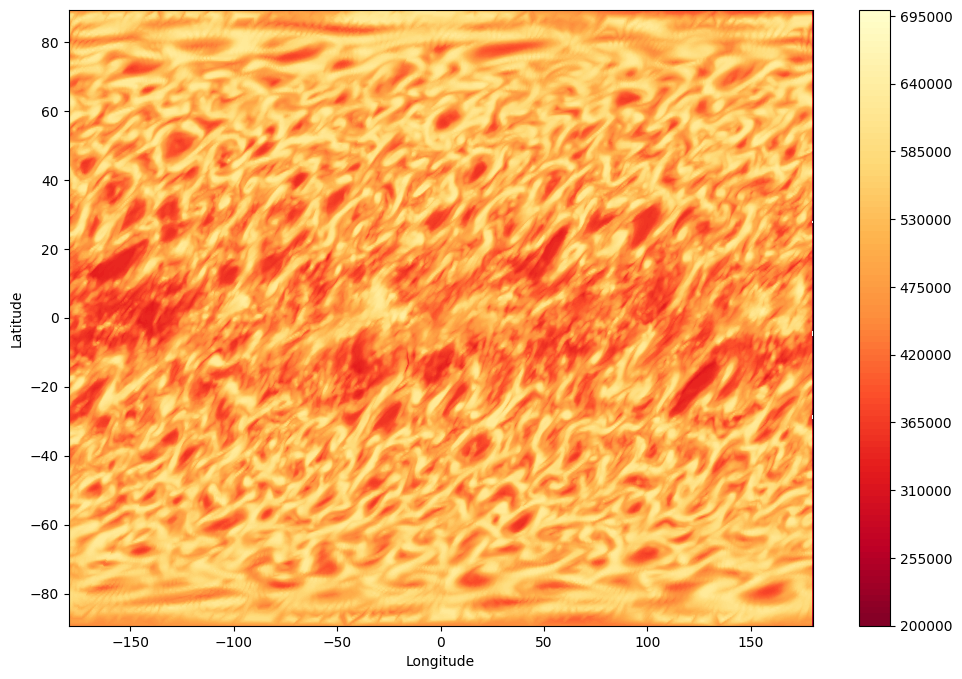

In [8]:
### Plot Xianyu's maps

plt.figure(figsize=(12, 8))
levels = np.linspace(200000, 700000, 101) #n+1 levels
plt.contourf(longitude,latitude,np.squeeze(a[:,:,ntime_plot]),cmap="YlOrRd_r",vmin=200000,vmax=700000,levels=levels)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.clim(200000,700000)
plt.colorbar()
plt.savefig("XianyuStarry/"+str(rotation_period) + "_XianyuMap.jpg")
plt.show()

In [9]:
### Set variable for ydeg

ydeg = 10

In [10]:
### Set projection type: ortho, rect, moll

projection_type = ["moll", "ortho","rect"]

In [11]:
### Generate Starry map at selected ydeg

for projection in projection_type:
    map = starry.Map(ydeg=ydeg)
    map.load(maps=b,image=flux_map)
    map.show(projection=projection,colorbar=True,file= "XianyuStarry/"+str(rotation_period)+"_XianyuMap_Starry_ydeg"+str(ydeg)+projection+".jpg")

In [12]:
### Reverse the latitude so when plotting, the latitude values will be in the correct order

latitude_flip = np.flip(latitude)

In [13]:
### Apply intensity function by latitude (rows)

Intensity = []
for lat in latitude:
    I = map.intensity(lat=lat, lon=longitude)
    Intensity.append(I)

In [14]:
### Extract Intensity values as calculated by Starry

Intensity_Values_Starry = []
for i in Intensity:
    for k in i:
        Intensity_Values_Starry.append(k)

In [15]:
### Extract Intensity values from model 

Intensity_Values = []
for i in a:
    for k in i:
        for j in k:
            Intensity_Values.append(j)

In [21]:
### Create bins for histogram

bins = np.arange(250000,800000,50000)
bins

array([250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000,
       650000, 700000, 750000])

In [22]:
### Set a new array to the plotted intensity, then flatten the array to make it 1D

b = np.squeeze(a[:,:,ntime_plot])
c = b.flatten()

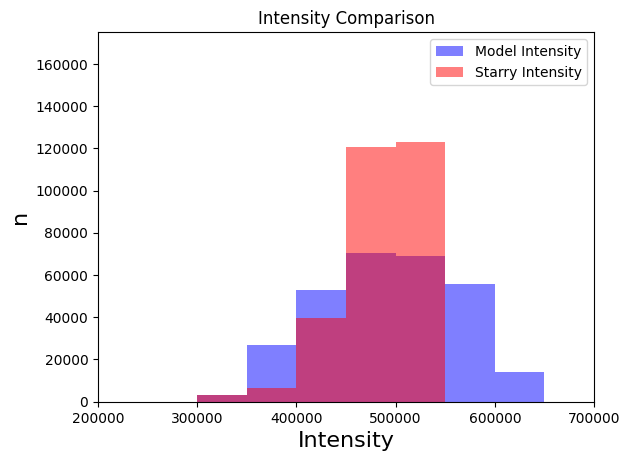

In [23]:
### Plotting both Intensity histograms

plt.hist(c, alpha=0.5,label="Model Intensity",color="blue",bins=bins)
plt.hist(Intensity_Values_Starry, alpha=0.5,label="Starry Intensity",color="red",bins=bins)
plt.title("Intensity Comparison")
plt.xlabel("Intensity",fontsize=16)
plt.ylabel("n",fontsize=16)
plt.ylim(0,175000)
plt.xlim(200000,700000)
plt.legend()
plt.savefig("XianyuStarry/"+str(rotation_period) + "_XianyuMap_Intensity_Scatter_Both.jpg",dpi=300)
plt.show()

In [26]:
### Generate two arrays with lat/lon indices where the flux == 0 

i,j = np.where(b==0)

In [27]:
### Set new arrays to correspond to where the flux is 0

i2 = latitude[i]
j2 = longitude[j]

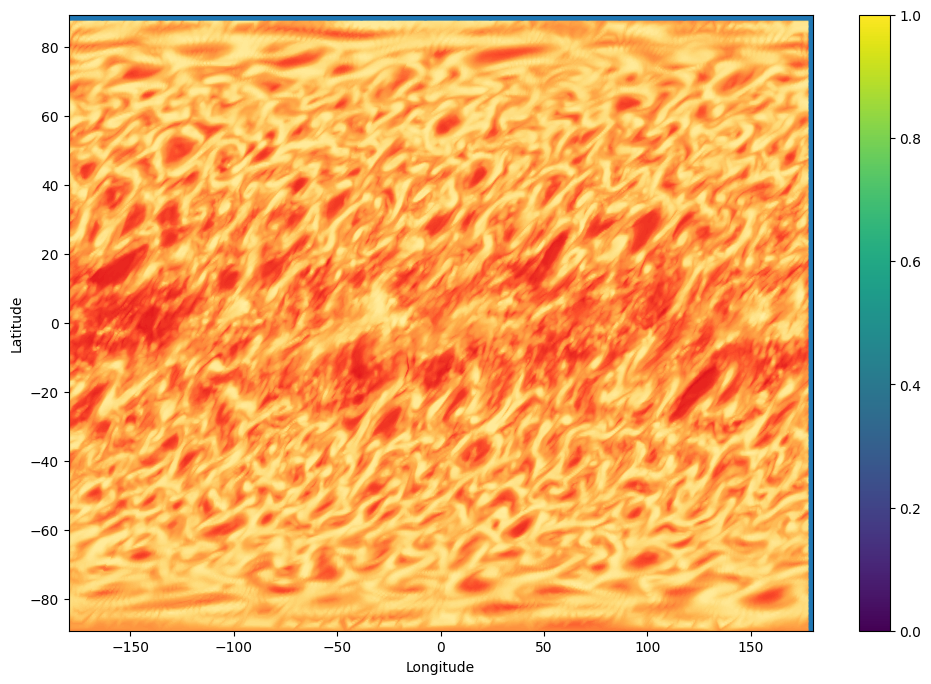

In [28]:
### Plot Xianyu's maps with zero values highlighted

plt.figure(figsize=(12, 8))
plt.contourf(longitude,latitude,np.squeeze(a[:,:,ntime_plot]),cmap="YlOrRd_r",vmin=200000,vmax=700000,levels=levels)
plt.scatter(j2,i2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.savefig("XianyuStarry/"+str(rotation_period) + "_XianyuMap_Zero.jpg",dpi=1000)
plt.show()